# Load and Show Image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

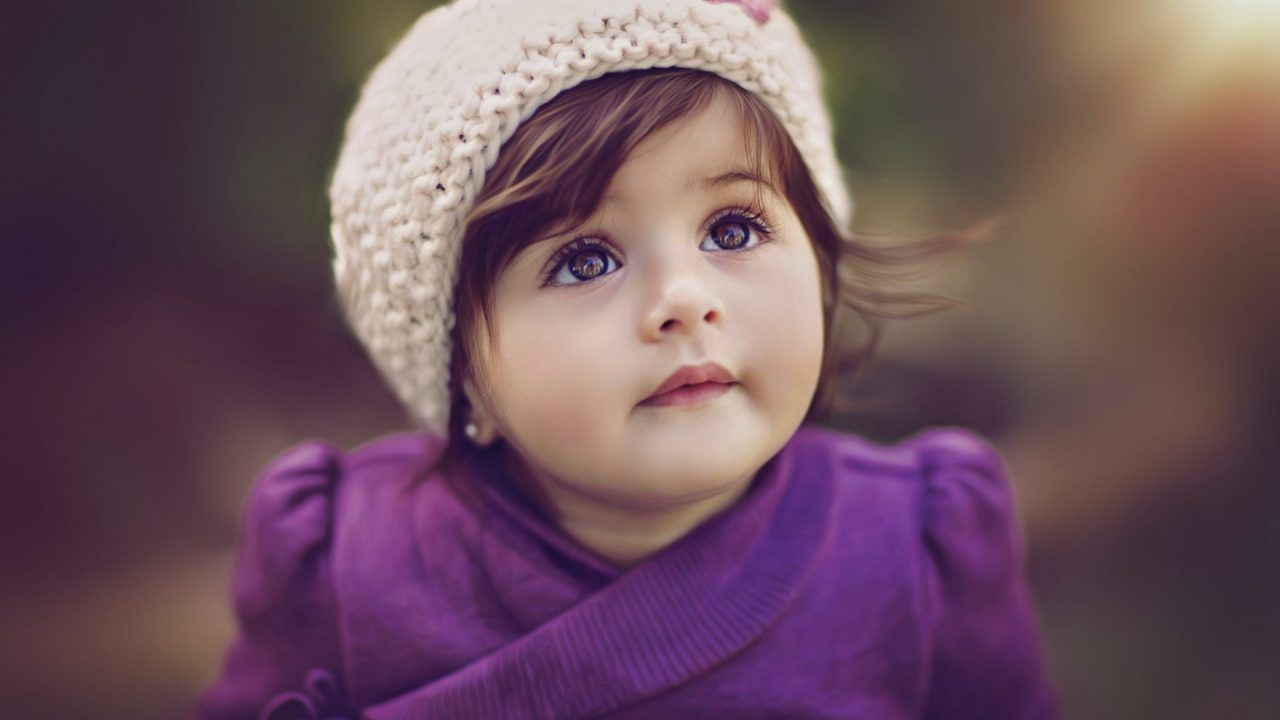

In [ ]:
img = cv2.imread("baby.jpg",1)
cv2_imshow(img)

# Extrack Specific Part From Image

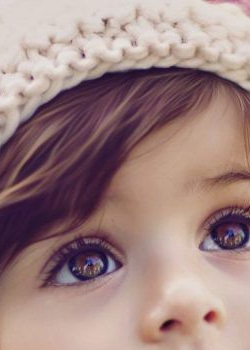

In [ ]:
#first two values up and down and second values left and right
roi = img[:350,500:750]
cv2_imshow(roi)

# Resizing the Image

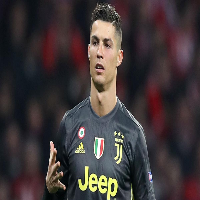

In [ ]:
resized = cv2.resize(img, (200, 200))
cv2_imshow(resized)

# Smoothing the Image


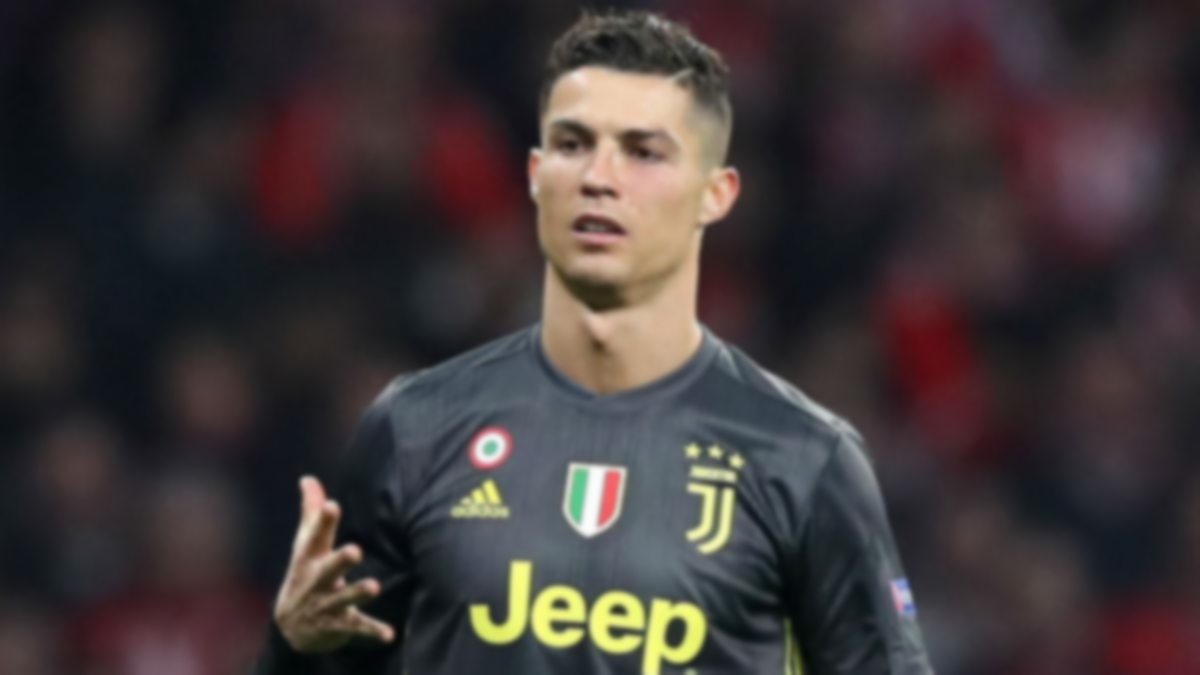

In [ ]:
blurred = cv2.GaussianBlur(img, (15, 15), 0)
cv2_imshow(blurred)

# Draw Something on Image

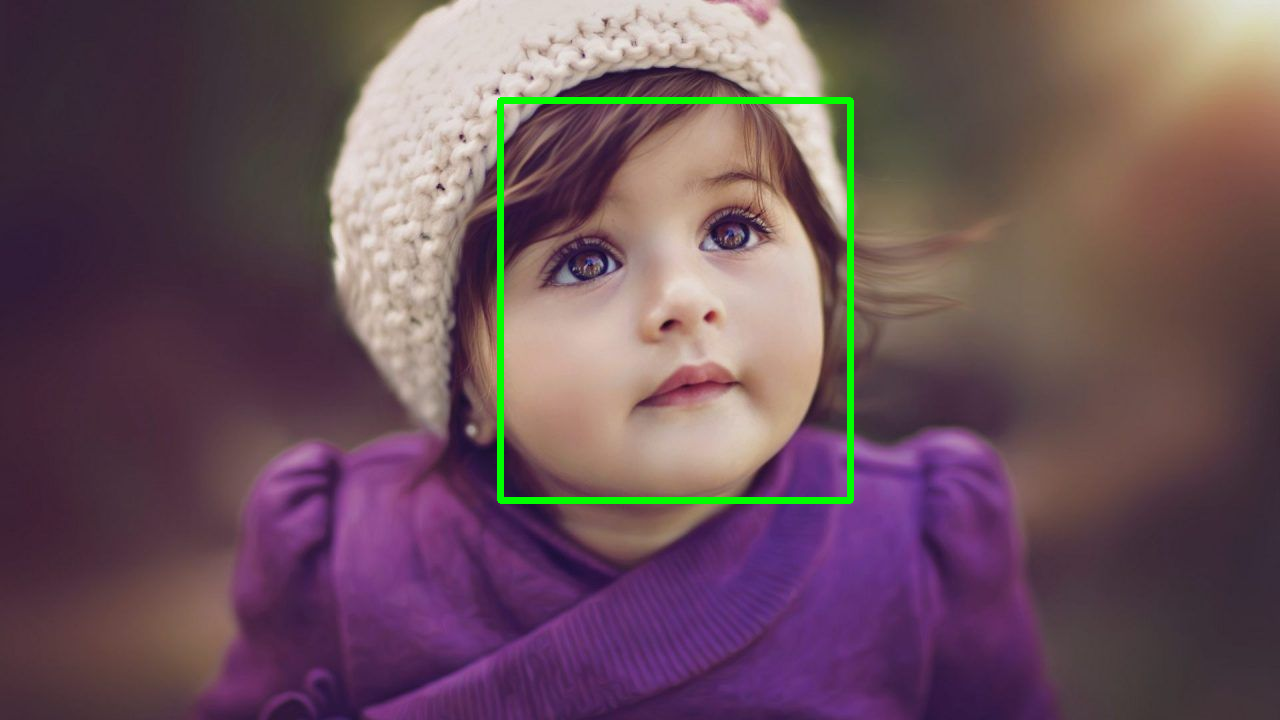

In [ ]:
output = img.copy()
#first value is represent left
#second value is represent up
#third value is represent right
#forth value is represent down
cv2.rectangle(output, (500, 100), (850, 500), (0, 255, 0), 5)
cv2_imshow(output)


# Write Some text on image

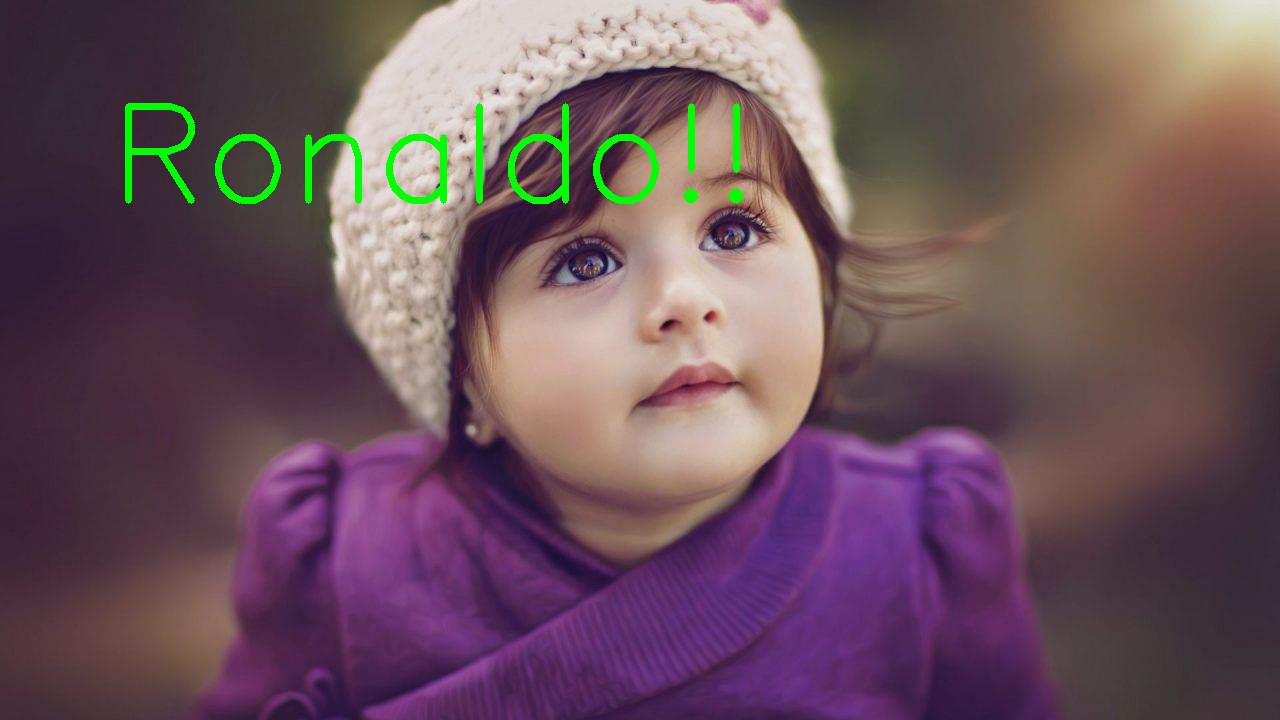

In [ ]:
output = img.copy()
cv2.putText(output, "Ronaldo!!", (110, 200), 
	cv2.FONT_HERSHEY_SIMPLEX, 4.5, (0, 255, 0), 5)
cv2_imshow(output)

# Implementation of Face detection model


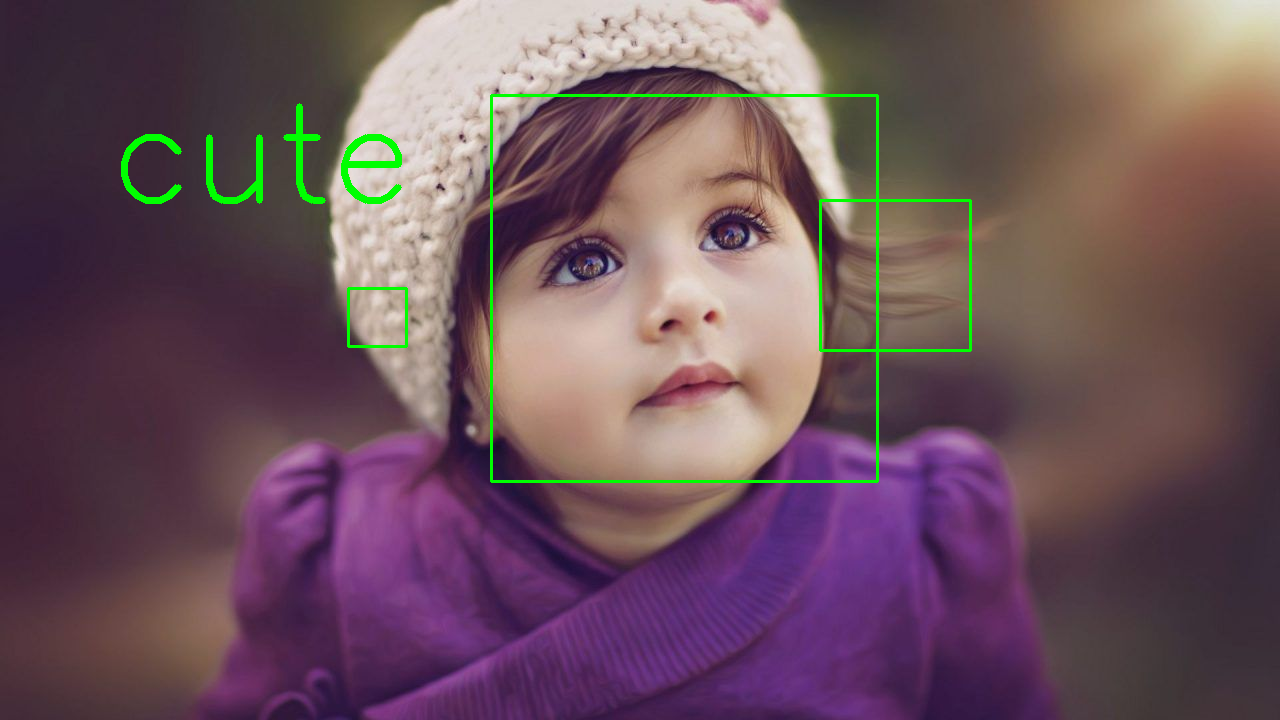

In [ ]:
import cv2

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")


img2 = cv2.imread("baby.jpg")
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(img2)

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img2, "cute", (110, 200), cv2.FONT_HERSHEY_SIMPLEX, 4.5, (0, 255, 0), 5)

# Display the resulting frame
cv2_imshow(img2)

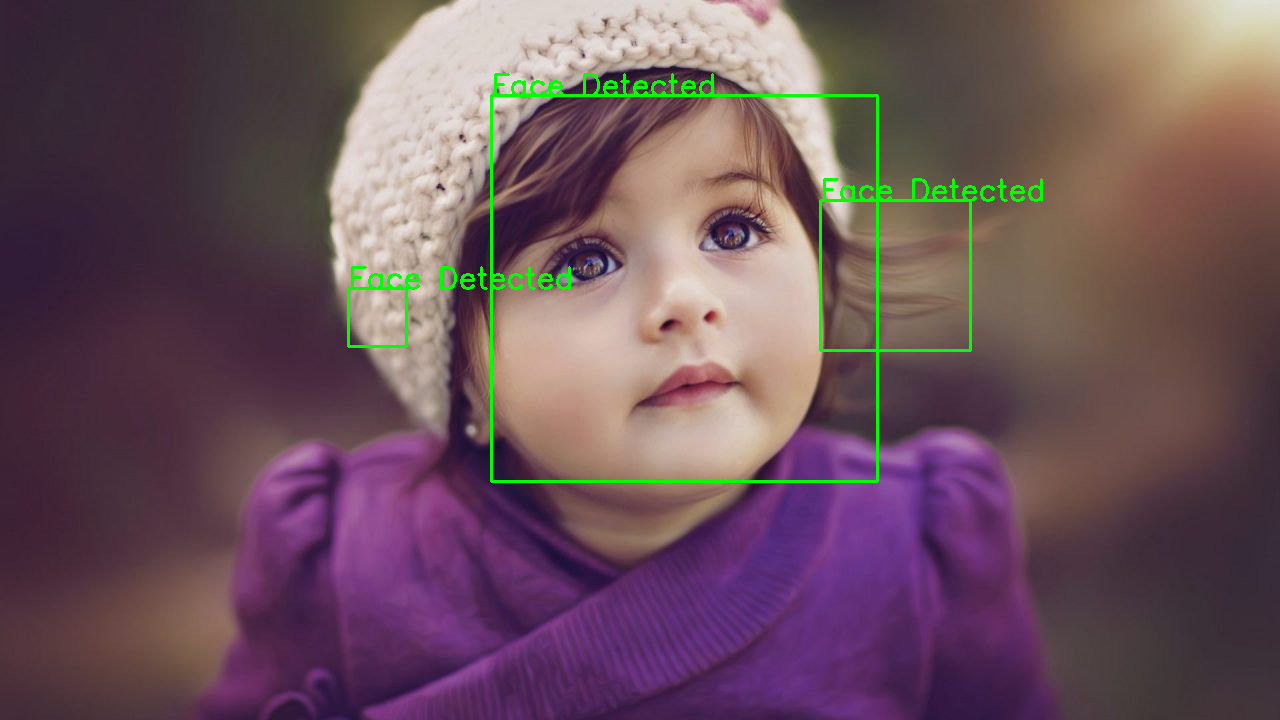

In [ ]:
import cv2

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")


img2 = cv2.imread("baby.jpg")
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray)

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img2, "Face Detected", (x, y), 
	cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the resulting frame
cv2_imshow(img2)


# Accessing The Camera

In [ ]:
from google.colab.patches import cv2_imshow
import cv2 
# Open the device at the ID 0
cap = cv2.VideoCapture(take_photo())
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    print(frame.shape)
    cv2_imshow(frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

cap.release()

cv2.destroyAllWindows()


AttributeError: ignored

In [ ]:
cv2.VideoCapture(0)

<VideoCapture 0x7fc5fb0b84d0>

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  #display(Image(filename))

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
f

In [ ]:
import cv2

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

video_capture = cv2.VideoCapture(2)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if (video_capture.isOpened() == False):
      print("Error opening video stream or file")
    #print(frame.shape)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray)

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, "Face Detected", (x, y), 
	cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

Error opening video stream or file


error: ignored

# Object Counting

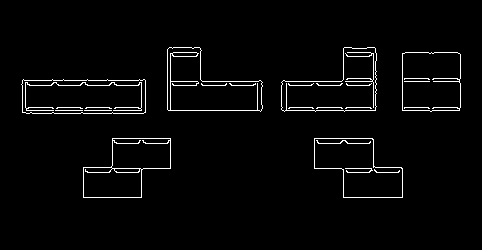

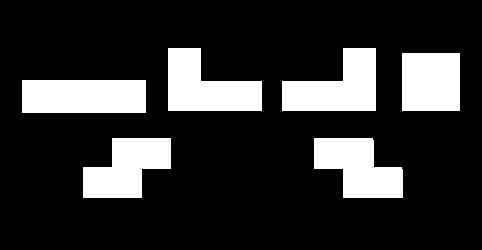

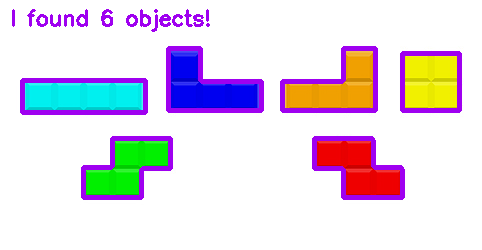

In [ ]:
import cv2
import imutils
image = cv2.imread("/content/tetris_blocks.png")
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 150)

cv2_imshow(edged)

thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]

cv2_imshow(thresh)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
	#cv2_imshow(output)

text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2_imshow(output)